# Moving average

Moving average is used to smooth out short-term fluctuations and highlight longer-term trends or cycles.

Base on our data from 2023/5/1 to 2023/11/2，we set a 21 day moving average and a 200 day moving average, covering the short-term and long-term analysis.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

csv_file_path = "/Users/xjy/Desktop/data1.csv"
df = pd.read_csv(csv_file_path)

df.head() # This will print the first 5 rows of the DataFrame

,Unnamed: 0,date,tic,close,Qty,Amount,Investing_value,Cash,portfolio_value
0,0,2022-05-02,AAPL,156.374557,0.0,0.0,0.0,1000000.0,1000000.0
1,1,2022-05-02,AMZN,124.500000,0.0,0.0,0.0,1000000.0,1000000.0
2,2,2022-05-02,DX,13.811177,0.0,0.0,0.0,1000000.0,1000000.0
3,3,2022-05-02,FAST,52.916119,0.0,0.0,0.0,1000000.0,1000000.0
4,4,2022-05-02,KO,60.669033,0.0,0.0,0.0,1000000.0,1000000.0


In [2]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')
print(df['date'].dtype)

datetime64[ns]


In [3]:
start_date = '2022-05-01'
end_date = '2023-11-02'

df['one_year_total_return'] = None

 ((end_price + total_dividends) / start_price) – 1

In [4]:
for tic in df['tic'].unique():
    stock_data = df[(df['tic'] == tic) & (df['date'] >= pd.to_datetime(start_date)) & (df['date'] <= pd.to_datetime(end_date))]
    stock_data.loc[:,'date'] = pd.to_datetime(stock_data['date'])  # change stock[] to stock.loc[:,]

    for idx, row in stock_data.iterrows():
        current_date = row['date']
        one_year_ago = current_date - pd.DateOffset(years=1)


        if one_year_ago >= pd.to_datetime(start_date) and one_year_ago in pd.to_datetime(stock_data['date']).values:
            start_price = stock_data[stock_data['date'] == one_year_ago]['close'].iloc[0]
            end_price = row['close']
            
            total_dividends = 0  # There is no dividend data, if there is, please adjust this section
            if 'dividends' in df.columns:
                dividends_data = stock_data[(stock_data['date'] > one_year_ago) & (stock_data['date'] <= current_date)]
                total_dividends = dividends_data['dividends'].sum()

            return_rate = ((end_price + total_dividends )/ start_price) - 1
            df.loc[idx, 'one_year_total_return'] = return_rate * 100  # change into %

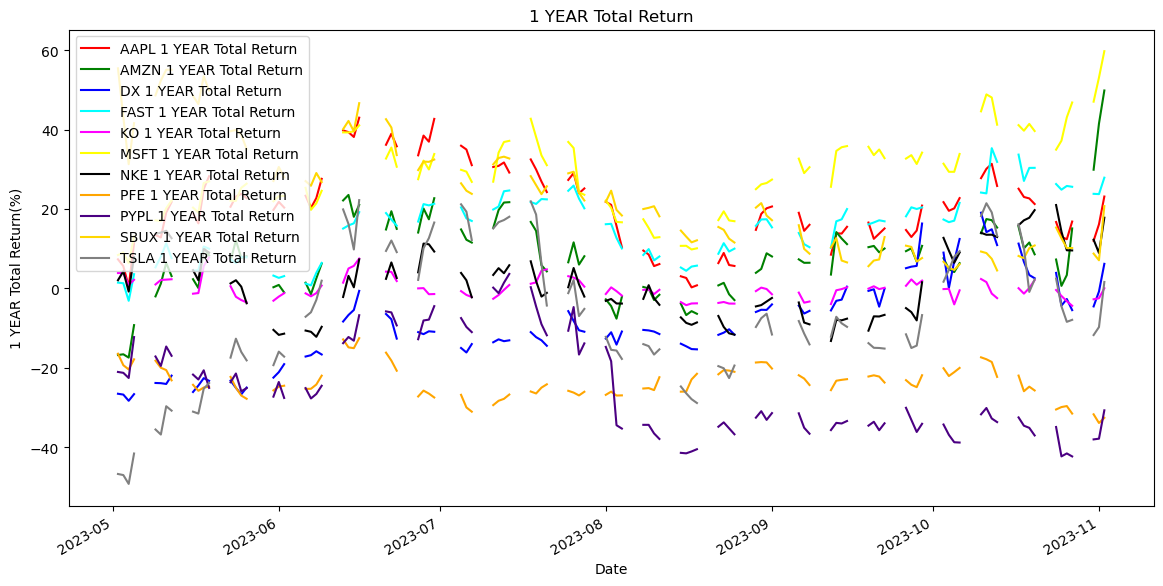

In [5]:
import matplotlib.pyplot as plt

tickers = df['tic'].unique()

colors = ['red', 'green', 'blue', 'cyan', 'magenta', 'yellow', 'black','Orange','Indigo','Gold', 'Grey']

# Start plotting
plt.figure(figsize=(14, 7))

# Loop through each ticker and plot both close price and moving average
for i, ticker in enumerate(tickers):
    # Select data for the current ticker
    ticker_data = df[df['tic'] == ticker]
    
    # Plot the close price and moving average for the ticker
    plt.plot(ticker_data['date'], ticker_data['one_year_total_return'], label=f'{ticker} 1 YEAR Total Return', color=colors[i % len(colors)], linestyle='-')

# Add title and labels
plt.title('1 YEAR Total Return')
plt.xlabel('Date')
plt.ylabel('1 YEAR Total Return(%)')

# Add a legend
plt.legend()

# Auto-format the date on the x-axis
plt.gcf().autofmt_xdate()

# Show the plot
plt.show()

This is beacuse we do not trade in weekends.
Please see the following graph which only contains trading days.

In [6]:
df = df.dropna(subset=['one_year_total_return'])

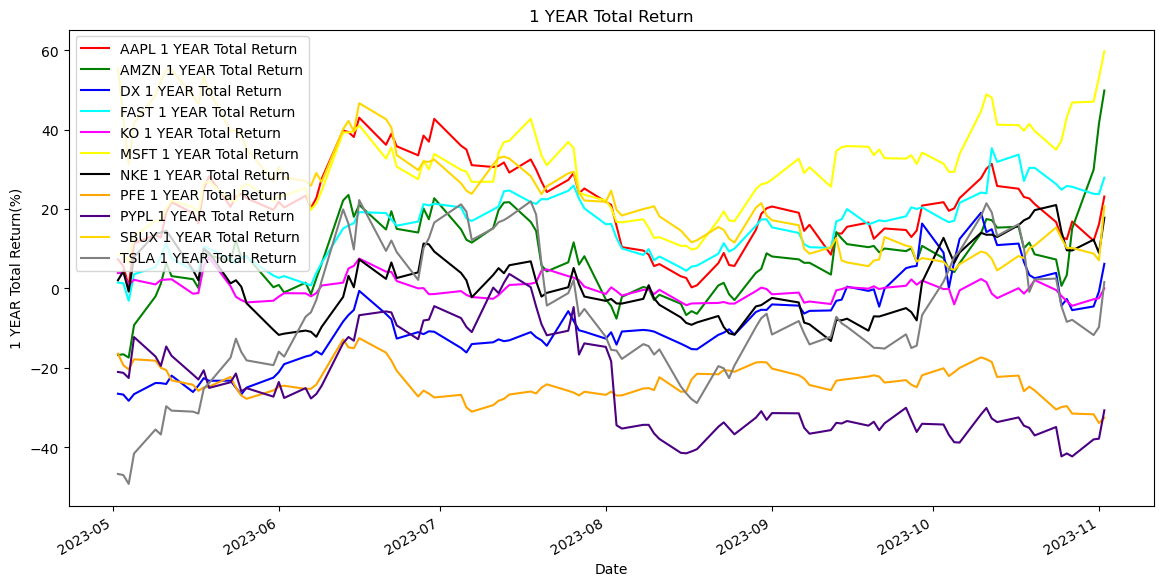

In [7]:
import matplotlib.pyplot as plt

tickers = df['tic'].unique()

colors = ['red', 'green', 'blue', 'cyan', 'magenta', 'yellow', 'black','Orange','Indigo','Gold', 'Grey']

# Start plotting
plt.figure(figsize=(14, 7))

# Loop through each ticker and plot both close price and moving average
for i, ticker in enumerate(tickers):
    # Select data for the current ticker
    ticker_data = df[df['tic'] == ticker]
    
    # Plot the close price and moving average for the ticker
    plt.plot(ticker_data['date'], ticker_data['one_year_total_return'], label=f'{ticker} 1 YEAR Total Return', color=colors[i % len(colors)], linestyle='-')

# Add title and labels
plt.title('1 YEAR Total Return')
plt.xlabel('Date')
plt.ylabel('1 YEAR Total Return(%)')

# Add a legend
plt.legend()

# Auto-format the date on the x-axis
plt.gcf().autofmt_xdate()

# Show the plot
plt.show()

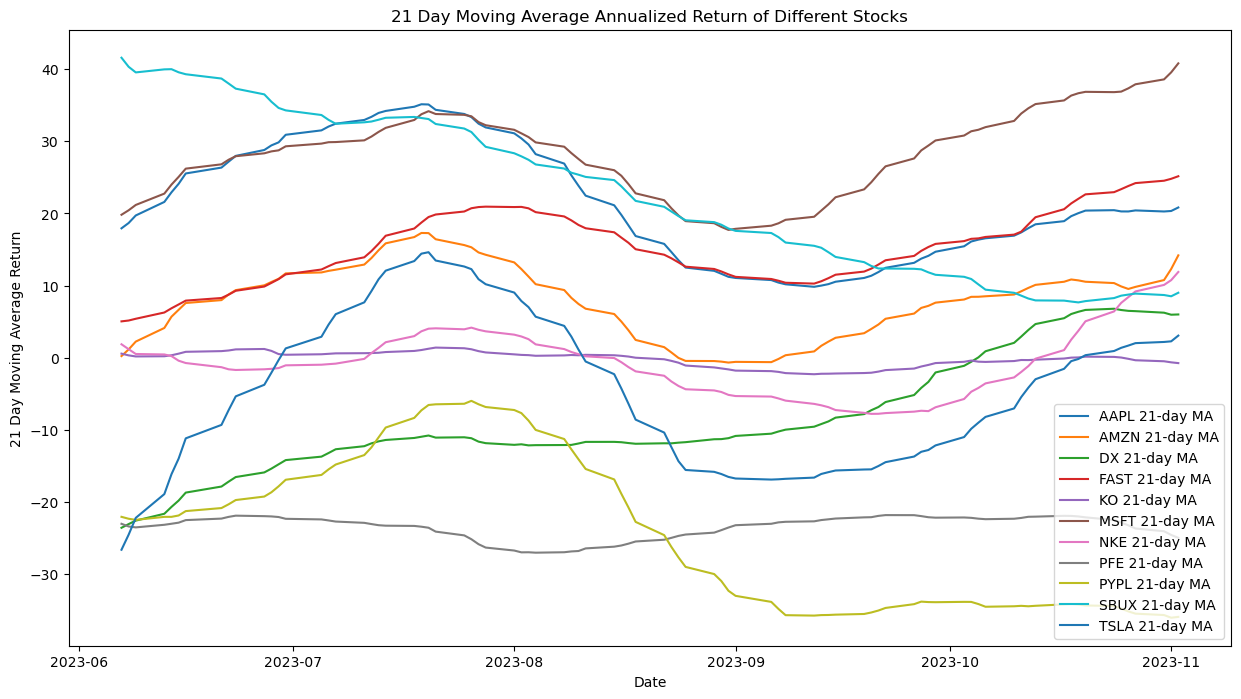

In [8]:
moving_average_days_1 = 21
df['21_moving_avg_return'] = df.groupby('tic')['one_year_total_return'].transform(lambda x: x.rolling(window=moving_average_days_1).mean())

start_date = '2023-05-01'
end_date = '2023-11-02'
df_filtered = df[(df['date'] >= start_date) & (df['date'] <= end_date)]

plt.figure(figsize=(15, 8))

for tic in df_filtered['tic'].unique():
    df_tic = df_filtered[df_filtered['tic'] == tic]
    plt.plot(df_tic['date'], df_tic['21_moving_avg_return'], label=f'{tic} 21-day MA')

plt.xlabel('Date')
plt.ylabel('21 Day Moving Average Return')
plt.title('21 Day Moving Average Annualized Return of Different Stocks')
plt.legend()
plt.show()

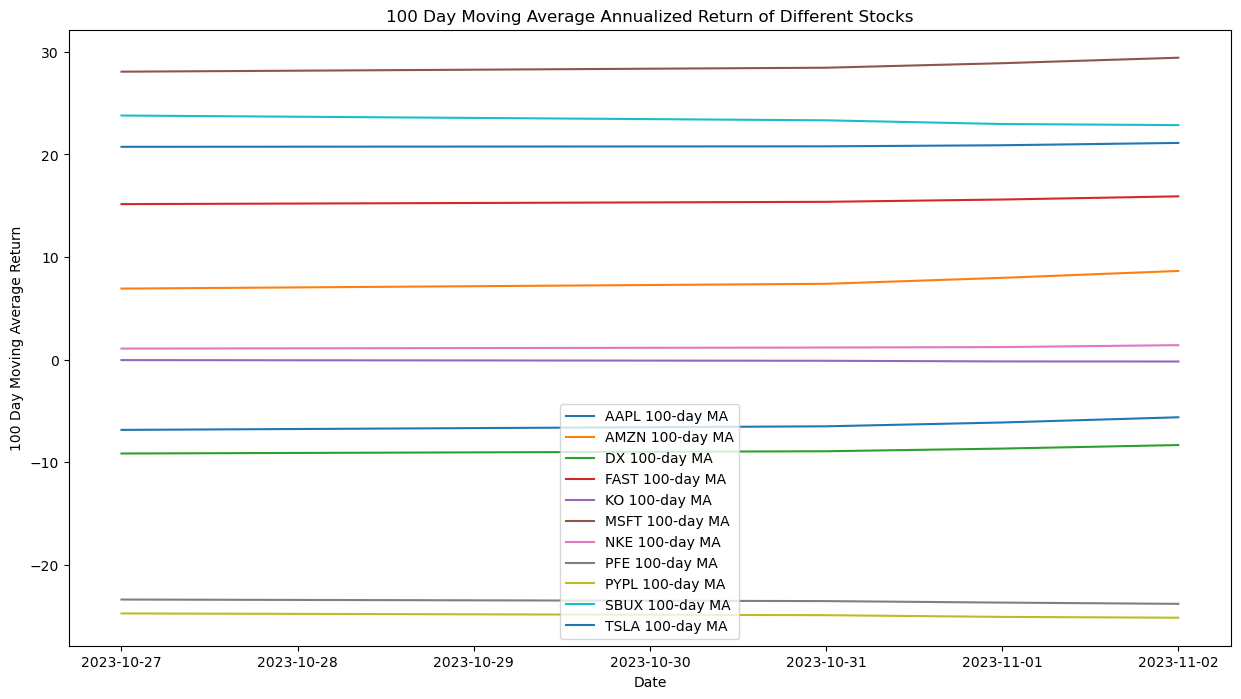

In [14]:
moving_average_days_2 = 100
df['100_moving_avg_return'] = df.groupby('tic')['one_year_total_return'].transform(lambda x: x.rolling(window=moving_average_days_2).mean())

start_date = '2023-05-01'
end_date = '2023-11-02'
df_filtered = df[(df['date'] >= start_date) & (df['date'] <= end_date)]

plt.figure(figsize=(15, 8))

for tic in df_filtered['tic'].unique():
    df_tic = df_filtered[df_filtered['tic'] == tic]
    plt.plot(df_tic['date'], df_tic['100_moving_avg_return'], label=f'{tic} 100-day MA')

plt.xlabel('Date')
plt.ylabel('100 Day Moving Average Return')
plt.title('100 Day Moving Average Annualized Return of Different Stocks')
plt.legend()
plt.show()

In [10]:
df

,Unnamed: 0,date,tic,close,Qty,Amount,Investing_value,Cash,portfolio_value,one_year_total_return,21_moving_avg_return,200_moving_avg_return
2761,2761,2023-05-02,AAPL,167.859070,0.0,0.00,0.000000,1000000.00,1.000000e+06,7.344233,NaN,NaN
2762,2762,2023-05-02,AMZN,103.629997,0.0,0.00,0.000000,1000000.00,1.000000e+06,-16.763054,NaN,NaN
2763,2763,2023-05-02,DX,10.148072,0.0,0.00,0.000000,1000000.00,1.000000e+06,-26.522757,NaN,NaN
2764,2764,2023-05-02,FAST,53.697048,0.0,0.00,0.000000,1000000.00,1.000000e+06,1.475788,NaN,NaN
2765,2765,2023-05-02,KO,63.026154,0.0,0.00,0.000000,1000000.00,1.000000e+06,3.885212,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
4175,4175,2023-11-02,NKE,105.080002,400.0,994957.46,42032.000732,5042.54,1.052745e+06,17.836894,11.890547,NaN
4176,4176,2023-11-02,PFE,30.094257,100.0,994957.46,3009.425735,5042.54,1.052745e+06,-32.591155,-24.948124,NaN
4177,4177,2023-11-02,PYPL,55.060001,2500.0,994957.46,137650.003433,5042.54,1.052745e+06,-30.698548,-35.906104,NaN
4178,4178,2023-11-02,SBUX,99.463448,750.0,994957.46,74597.585678,5042.54,1.052745e+06,20.754174,9.011564,NaN


## Return contribution

Return Contribution of a Stock = Weight of the Stock in the Portfolio × Return of the Stock                      

In [ ]:
df['daily_return'] =df.groupby('tic')['close'].pct_change()
df['weight'] = df['Investing_value'] /  df['portfolio_value']
df['stock_return'] = df['weight'] * df['daily_return'] * 100

In [ ]:
start_date = '2023-05-01'
end_date = '2023-11-02'
df_filtered = df[(df['date'] >= start_date) & (df['date'] <= end_date)]

# Plot
tickers = df['tic'].unique()
colors = ['red', 'green', 'blue', 'cyan', 'magenta', 'yellow', 'black','Orange','Indigo','Gold', 'Grey']
plt.figure(figsize=(14, 7))

for i, ticker in enumerate(tickers):
    # Select data for the current ticker
    ticker_data = df_filtered[df_filtered['tic'] == ticker]
    
    # Plot the close price and moving average for the ticker
    plt.plot(ticker_data['date'], ticker_data['stock_return'], label=f'{ticker} Return Contribution', color=colors[i % len(colors)], linestyle='-')
    

# Add title and labels
plt.title('Return Contribution Analysis for Stock Portfoilo')
plt.xlabel('Date')
plt.ylabel('Return Contribution')

# Add a legend
plt.legend()

# Auto-format the date on the x-axis
plt.gcf().autofmt_xdate()

# Show the plot
plt.show()

In [ ]:
df.to_csv('/Users/xjy/Desktop/Technical Analysis1.csv', index=False)

In [15]:
count(df['date'].unique())

NameError: name 'count' is not defined